## Classify using decision Tree classification
## If salary is >100k then class  1
##                             else class 0

In [1]:
import pandas as pd
df = pd.read_csv("e:\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [14]:
df.tail

<bound method NDFrame.tail of        company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors              

In [2]:
inputs = df.drop('salary_more_then_100k',axis='columns')

target = df['salary_more_then_100k']

In [3]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [5]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [13]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)
model.score(inputs_n,target)

1.0

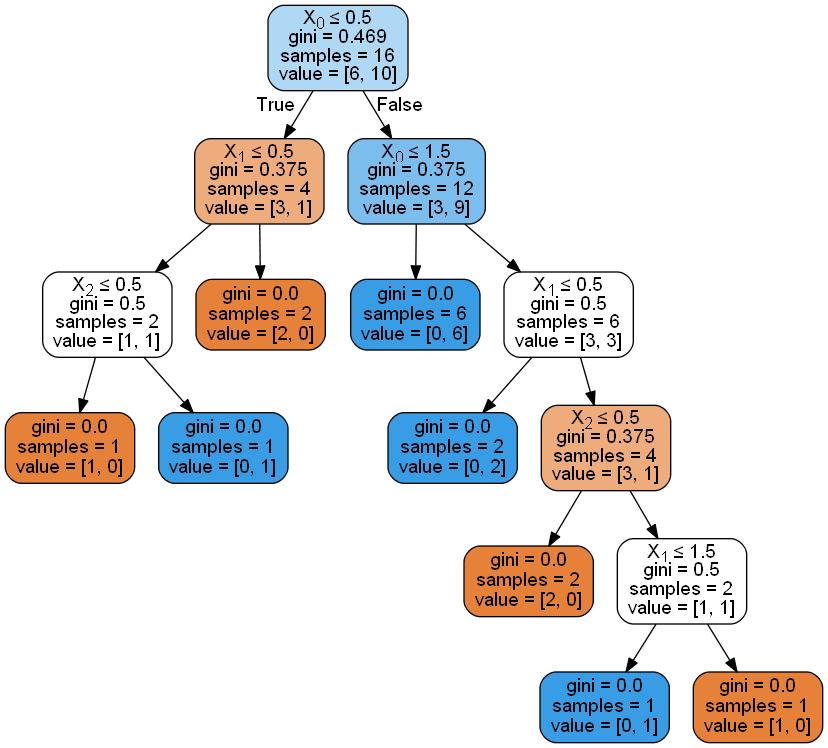

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
COMPANY=int(input("abc pharma:0\nfacebook:1\ngoogle:2 :: "))
CO=float(input("Computer Engineer 0/1 ::"))
MA=float(input("Masters degree 0/1 ::"))

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Predict Salary")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        p=model.predict([[COMPANY,CO,MA]])
        if p==0:
            print("SORRY LESS THAN 100K")
        else:print("CONGO MORE THAN 100K")

button.on_click(on_button_clicked)

abc pharma:0
facebook:1
google:2 :: 0
Computer Engineer 0/1 ::0
Masters degree 0/1 ::0


Button(description='Predict Salary', style=ButtonStyle())

Output()